<a href="https://colab.research.google.com/github/GUNWOOOH/ADP_Practice/blob/main/%EA%B8%B0%EC%B6%9C%EB%B3%B5%EC%9B%90/%EA%B8%B0%EC%B6%9C%EB%B3%B5%EC%9B%90_%EC%97%B0%EA%B4%80%EB%B6%84%EC%84%9D%2C%EC%8B%9C%EA%B3%84%EC%97%B4%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#연관분석 및 시계열분석 ADP 기출 및 예제

1. 연관분석

1) 연관규칙분석을 수행하기 위해 lotto 데이터셋을 transaction 데이터로 변환하시오. (단, 본 분석에서 로또번호가 추첨된 순서는 고려하지 않고 분석을 수행하도록 한다.) 그리고 변환된 데이터에서 가장 많이 등장한 상위 10개의 로또번호를 막대그래프로 출력하고 이에 대해 설명하시오.

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from collections import Counter
import matplotlib.pyplot as plt
from apyori import apriori

path = './모의고사 1회/lotto.csv'
data= pd.read_csv(path)
ddata=data[['num1','num2','num3','num4','num5','num6']]
ddata

R에서는 데이터 형태를 변형하기 위해 'reshape2' 라이브러리를 설치하여 '트랜잭션'데이터의 형태를 변환한다.

하지만 python에서 대체할 수 있는 'reshape' 형태의 라이브러리가 없다. 가장 비슷한 라이브러리는 TransactionEncoder()이다. 

In [ ]:
ddata= ddata.astype('string')
df_list=ddata.values.tolist()
te = TransactionEncoder()
te_ary = te.fit(df_list).transform(df_list)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [ ]:
df

가장 많이 나온 숫자 상위 10개를 뽑습니다.

In [ ]:
import numpy as np
list_count = np.array(df_list).flatten().tolist()
count=Counter(list_count)
sorted_C_union = sorted(count.items(), key=lambda x: (-x[1], x[0]))
d = pd.DataFrame.from_dict(sorted_C_union)
#가장 많이 뽑힌 숫자 상위 10개 뽑기
d.rename(columns={0:'num', 1:'count'}, inplace=True)
d=d.sort_values(by='count', ascending=False)[:10]

plt.figure(figsize=(20,16))
plt.xticks(fontsize = 18 )
plt.bar(d['num'].values, d['count'].values)

2) 변환한 데이터에 대해 apriori함수를 사용하여 다음 괄호 안의 조건을 반영하여 연관규칙을 생성하고, 이를 'rules_1'이라는 변수에 저장하여 결과를 해석하시오(최소 지지도: 0.002, 최소 신뢰도: 0.8, 최소조합 항목수: 2개, 최대조합 항목 수 :6개) 그리고 도출된 연관규칙들을 향상도를 기준으로 내림차순 정렬하여 상위 30개의 규칙을 확인하고, 이를 데이터프레임으로 변환하여 csv파일로 출력하시오.

In [ ]:
from mlxtend.frequent_patterns import apriori
#최소 지지도 0.002 
frequent_itemsets = apriori(df, min_support=0.002, use_colnames=True)

#최소 신뢰도 0.8를 위한 작업
frequent_ = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)

In [ ]:
#최대 조합수 6개 최소 조합수 2개 
freq=frequent_[ (frequent_['antecedent_len'] >= 2) &  (frequent_['antecedent_len'] <= 6)]
freq

향상도인 "lift"를 기준으로 규칙들을 내림차순 정렬한 후, 상위 30개의 규칙을 확인한다. 

In [ ]:
result = freq.sort_values(by='lift', ascending=False)[:30]
result

2. 연관분석

 음식 메뉴 주문 연관분석 ( A, AAA, BB, AAA, BBBB, B, AA, BBBB, AAAA 이런식의 데이터)
- 데이터 셋을 따로 주지는 않음
- A, B 메뉴 주문 연관분석 수행

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

dataset = [['A'],
           ['A','A','A'],
           ['B', 'B'],
           ['A','A','A'],
           ['B','B','B','B'],
           ['B'],
           ['A','B'],
           ['B','B','A'],
           ]
          
te = TransactionEncoder()
te_ary = te.fit_transform(dataset)
te_ary


array([[ True, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [False,  True],
       [False,  True],
       [ True,  True],
       [ True,  True]])

# 3, 시계열분석(26회)

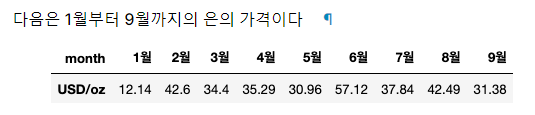

  1)  은의 가격 및 이동평균값 3이 설정된 시계열 그래프를 그려라

  2) 1월 대비 9월의 은의 가격은 몇 % 올랐는가? 소수점 두번째 자리에서 반올림

# 4. 시계열분석 (17회)

코로나19에 대한 나라별 데이터로 모델링 진행
데이터 출처 : https://www.kaggle.com/imdevskp/corona-virus-report 

일부 후처리 데이터 경로 : /kaggle/input/adp-kr-p3/problem2.csv


컬럼

 - location : 지역명
 - date : 일자
 - total_cases : 누적 확인자
 - total_deaths : 누적 사망자
 - new_tests : 검사자
 - population : 인구
 - new_vaccinations : 백신 접종자

  1)  마지막 일자를 기준으로 인구 대비 확진자 비율이 높은 상위 5개 국가를 구하여라
상위 5개 국가별로 누적 확진자, 일일 확진자, 누적 사망자, 일일 사망자, 그래프, 범례를 이용해서 가독성 있게 만들어라

In [ ]:
df =pd.read_csv('/kaggle/input/adp-kr-p3/problem2.csv')
df['ratio'] = df['total_cases'] / df['population']


# 전체 데이터의 결측치 및 일일 확진, 사망자 확인
# 2021-11-30에는 new_tests , new_vaccinations값이 nan 이므로 제외
# 인구수 0인 케이스 제외
import matplotlib.pyplot as plt 
df = df.fillna(0)
df['date']  = pd.to_datetime(df['date'])
df = df[df.date != pd.to_datetime('2021-11-30')]
df = df[df.population !=0]

for location in df.location.unique():
    lo = df[df.location == location]
    df.loc[lo.index,'new_cases'] =lo.total_cases.diff().values
    df.loc[lo.index[0], 'new_cases'] = lo['total_cases'].values[0]

    df.loc[lo.index,'new_deaths'] =lo.total_deaths.diff().values
    df.loc[lo.index[0], 'new_deaths'] = lo['total_deaths'].values[0]
    
    df.loc[lo.index, 'total_vacciantions'] = lo['new_vaccinations'].cumsum().values
    df.loc[lo.index, '7days_new_case'] = lo['new_tests'].rolling(7).sum().fillna(0).values

import seaborn as sns
import matplotlib.pyplot as plt


locations = df.groupby(['location']).tail(1).sort_values('ratio',ascending=False).location.head(5).values
target = df[df.location.isin(locations)].reset_index(drop=True)
for v in ['total_cases','new_cases','total_deaths','new_deaths']:
    plt.figure(figsize = (15,5))
    plt.title(v)
    sns.lineplot(data=target,x= 'date',y=v,hue='location')
    plt.show()

  2) 코로나 위험지수를 직접 만들고 그 위험지수에 대한 설명을 적고 위험지수가 높은 국가들 10개를 선정해서 시각화

In [ ]:
# 위험지수 =  ( 최근일주일 누적 확진자 / 인구수)   + (일일 사망자 / 인구수) - (누적 백신 인구 / 인구수) * 보정 상수) * 보정 상수
print('''
코로나 위험지수는 코로나로 인한 국가의 위기정도를 표현한다. 코로나 전파 특성상 최근 일주일의 확진자 숫자가 그다음의 일주일에 영향을 준다.     
일일 사망자수는 현재 코로나의 국가 내에서의 치명율을 표현한다. 위기정도는 누적 백신인구에 의해 감소 될수 있다. 
국가간의 비교를 위해 각 국가의 인구수로 나눠주어 값을 스케일링하고, 변수간 보정상수를 통해 정수화를 유도한다
''')

In [1]:
def ratio_index(x):
    value = (x['7days_new_case'] / x['population'] + x['new_deaths'] / x['population'] - x['total_vacciantions'] / x['population']*0.001) *100
    return value


df['ratio_index'] = df.apply(ratio_index,axis=1)

NameError: ignored

In [ ]:
locations = df.groupby(['location']).tail(1).sort_values('ratio_index',ascending=False).location.head(10).values
target = df[df.location.isin(locations)].reset_index(drop=True)
for v in ['total_cases','new_cases','ratio_index']:
    plt.figure(figsize = (15,5))
    plt.title(v)
    sns.lineplot(data=target,x= 'date',y=v,hue='location')
    plt.show()

  3) 한국의 코로나 신규 확진자 예측해라(선형 시계열모델 + 비선형시계열 각각 한개씩 만들어라)

   - 선형시계열 - arma 
   - 비선형 시계열 - arima


In [ ]:
ko = df[df.location =='South Korea'].reset_index(drop=True)
ko.head()

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
mod = AutoReg(ko.new_cases, 3, old_names=False)
res = mod.fit()
print(res.summary())
fig = res.plot_predict(1,700)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(ko.new_cases, order=(0,1,1))
model_fit = model.fit(trend='c',full_output=True, disp=1)
print(model_fit.summary())

fig = model_fit.plot_predict(1,700)

# 5. 시계열분석 (25회)

경로 : /kaggle/input/adp-p7/problem2.csv

데이터 설명

각 raw는 관광지 A의 1990년 1월 부터 25년동안의 매달 평균 이용객 숫자이다.

1)  EDA와 시각화를 진행하라

2) 결측치 처리와 해당 결측치 처리 방식에 대한 논리적 근거를 제시하라

3)  계절성을 반영한 시계열 모델을 제시하고 정확도 측면에서 모델 성능 평가 할 것

4) 분석 결과 활용 가능 여부에 대한 분석 전문가로서의 제안



#5. 시계역분석(23회)

코로나 시계열 데이터

데이터 출처(후처리과정 미포함) :https://www.kaggle.com/antgoldbloom/covid19panels?select=country_panel.csv


데이터 경로 : /kaggle/input/adp-kr-p1/problem3_covid2.csv




1) 데이터는 일자별 각 나라의 일일 확진자수를 나타낸다. 각 나라의 일자별 누적확진자 수를 나타내는 데이터 프레임을 생성하라

2) 1에서 구한 데이터를 각 나라별로 acf값을 구하고(lag는 50개까지 구하고 첫번째 값을 제외하라) 국가를 기준으로 유클리디안 거리를 기준으로 클러스터링을 진행 후 계층적 군집 분석을 위해 덴드로그램 작성하라




# 6. 시계열분석 (18회)

시계열: 정상성 체크 및 시계열 예측


# 7.시계열분석 (19회)

통계분석(data: Traffic EPS 시계열 분석 - 매년 분기별로 작성된 20년치 데이터)

 - 시계열 데이터의 정규성과 이분산성을 설명하기 위한 시각화
 - 데이터가 정규성이 아니라면 고정 시계열이 있는지 확인하고 이를 처리
 - SARIMA 분석을 통해 여러 파라미터를 적용해보고 가장 성능이 좋은 것을 제시
 - 위 모델의 잔차와 잡음 시각화 및 분석